In [ ]:
#pip install tensorflow
#pip install nltk
#pip install jason

In [17]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
import json
import numpy
import tensorflow
import random
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt


# (1) Extracting Data

In [18]:
with open('intents.json') as file:
    data = json.load(file)

# empty list
words = []
labels = []
docs_x = []
docs_y = []

for intent in data['intents']:
    for pattern in intent['patterns']:         # for each pattern
        wrds = nltk.word_tokenize(pattern)     # list of all words ['Is', 'anyone', 'there', '?']
        words.extend(wrds)                     # form a whole list of string
        docs_x.append(wrds)                    # form a list of list
        docs_y.append(intent["tag"])           # store tags: list of tag(string) for each pattern


    if intent['tag'] not in labels:    
        labels.append(intent['tag'])           # tag set(no repeating)
        
#print doc_x, doc_y
print("id    doc_y      <--------  doc_x")
print("-----------------------------")
for i in range(len(docs_x)):
    print(i, docs_y[i] , " <--------- ",docs_x[i] )

# all words
print("\n all words in the documents:\n", words)

id    doc_y      <--------  doc_x
-----------------------------
0 greeting  <---------  ['Hi']
1 greeting  <---------  ['How', 'are', 'you']
2 greeting  <---------  ['Is', 'anyone', 'there', '?']
3 greeting  <---------  ['Hello']
4 greeting  <---------  ['Good', 'day']
5 goodbye  <---------  ['Bye']
6 goodbye  <---------  ['Bye', 'bye']
7 goodbye  <---------  ['Bye-Bye']
8 goodbye  <---------  ['See', 'you', 'later']
9 goodbye  <---------  ['Goodbye']
10 thanks  <---------  ['Thanks']
11 thanks  <---------  ['Thank', 'you']
12 thanks  <---------  ['That', "'s", 'helpful']
13 hours  <---------  ['What', 'hours', 'are', 'you', 'open', '?']
14 hours  <---------  ['What', 'are', 'your', 'hours', '?']
15 hours  <---------  ['When', 'are', 'you', 'open', '?']
16 payments  <---------  ['Do', 'you', 'take', 'credit', 'cards', '?']
17 payments  <---------  ['Do', 'you', 'accept', 'Mastercard', '?']
18 payments  <---------  ['Are', 'you', 'cash', 'only', '?']
19 opentoday  <---------  ['Are', 'y

# (2) Word Stemming and Bag of Words
i.e. Keep,keeps, keeping, kept, => keep

In [19]:
words = [stemmer.stem(w.lower()) for w in words if (w != "?" ) ]
words = [stemmer.stem(w.lower()) for w in words if (w != "'s" ) ]
words = sorted(list(set(words))) # remove the repeated words and put in list for sorting

labels = sorted(labels)
print("Total stem words:", len(words)) # word list like vocab.
print("Bag of  words:\n", words)
print("label:",labels)

Total stem words: 40
Bag of  words:
 ['a', 'acceiv', 'anyon', 'ar', 'bye', 'bye-by', 'card', 'cash', 'credit', 'day', 'do', 'good', 'goodby', 'hav', 'hello', 'help', 'hi', 'hour', 'how', 'is', 'lat', 'lik', 'mastercard', 'on', 'op', 'rain', 'see', 'sunny', 'tak', 'thank', 'that', 'the', 'ther', 'today', 'we', 'wea', 'what', 'when', 'yo', 'you']
label: ['goodbye', 'greeting', 'hours', 'opentoday', 'payments', 'thanks', 'weather']


# (3) Encoding Training data and label

In [29]:
# We have a big of word based on our : 40 stem words, bag size = 40
# For each question and find its encoding:  
#      for example: hello => [ 0 0 0 ... 0 1  0 0 0 0 ... 0] 
#  
# for all 25 examples ==> X data: 25 x 40 


# we have seven categorical labels  [0, 1, 2, ... 5, 6]
# For all 25 sentences we have y data
#   y: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 5, 5, 2, 2, 2, 4, 4, 4, 3, 3, 3, 6, 6, 6]

X = []
y = []

for x, doc in enumerate (docs_x ) : # for all questions (total 25 )
                                
    bag = []         # finally, it is 40 long wiht some 1 and 0 for each sentence
    wrds = [stemmer.stem(w.lower()) for w in doc]   # each word in a question 

    for w in words:  # scan the stem words one by one
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)
    X.append(bag)
    y.append( labels.index(docs_y[x]) )   

# print(X)
print(y)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 5, 5, 2, 2, 2, 4, 4, 4, 3, 3, 3, 6, 6, 6]


In [21]:
# DNN model

len1 = len(X[0])        # input vector length:   40   (input vector size)
len2 = len(labels)      # output numbers: 7  (# of labels) 

model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_dim=len1, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(len2, activation='softmax'))

In [22]:
# we need sparse_categorical_crossentropy to match 7 to 1
model.compile(loss="sparse_categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

Train on 25 samples
Epoch 1/50
25/25 [==============================] - 0s 11ms/sample - loss: 1.9777 - accuracy: 0.0800
Epoch 2/50
25/25 [==============================] - 0s 278us/sample - loss: 1.9180 - accuracy: 0.1200
Epoch 3/50
25/25 [==============================] - 0s 279us/sample - loss: 1.8763 - accuracy: 0.2400
Epoch 4/50
25/25 [==============================] - 0s 239us/sample - loss: 1.8412 - accuracy: 0.3200
Epoch 5/50
25/25 [==============================] - 0s 279us/sample - loss: 1.8088 - accuracy: 0.4800
Epoch 6/50
25/25 [==============================] - 0s 199us/sample - loss: 1.7777 - accuracy: 0.5600
Epoch 7/50
25/25 [==============================] - 0s 279us/sample - loss: 1.7479 - accuracy: 0.6000
Epoch 8/50
25/25 [==============================] - 0s 239us/sample - loss: 1.7185 - accuracy: 0.7200
Epoch 9/50
25/25 [==============================] - 0s 319us/sample - loss: 1.6900 - accuracy: 0.7200
Epoch 10/50
25/25 [==============================] - 0s 239us/s

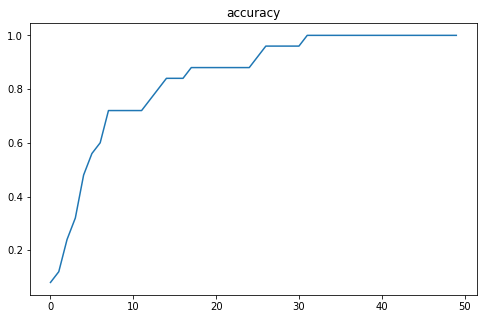

In [23]:
#train
history = model.fit(X, y, epochs=50, verbose = 1)
pd.DataFrame(history.history['accuracy']).plot(figsize=(8, 5), legend = False, title =  "accuracy")
plt.show()

In [24]:
# purpose:  encode a new test input sentence into a vector
# input:    s = sentence, words=bag of words
# return:   bag = encoded vectore of input sentence s 


def bag_of_words(s, words):
    bag = [0 for _ in range(len(words))]

    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]

    for se in s_words:
        for i, w in enumerate(words):
            if w == se:
                bag[i] = 1
            
    return bag


In [26]:
# driver
def chat():
    print("Start type in your question (type quit to stop)!")
    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
            break

        results_index = model.predict_classes([bag_of_words(inp, words)] )
        tag_caller = labels[results_index[0]]

        found = False
        for tg in data["intents"]:
            if tg['tag'] == tag_caller:
                responses = tg['responses']
                print(" -- MACHINE:", random.choice(responses))
                found = True
                break
        if(not(found)):
            print(" -- MACHINE: not sure what you mean. Try again")
            

if __name__ == "__main__":
    chat()

Start type in your question (type quit to stop)!
You: Hello how are you
 -- MACHINE: Hi there, how can I help?
You: Do you open today?
 -- MACHINE: We're open every day from 9am-9pm
You: Do you accept Cash?
 -- MACHINE: We accept VISA, Mastercard and AMEX
You: Thanks bye
 -- MACHINE: bye
You: quit


# REF

https:
https://techwithtim.net/tutorials/ai-chatbot/part-1/

vid 1-4
https://www.youtube.com/watch?v=wypVcNIH6D4

vid 5
https://www.youtube.com/watch?v=jBXAi-Vm_-g 

  

In [27]:
# end